In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
random.seed(42) # define the seed (important to reproduce the results)

data_iris = pd.read_csv('data/iris.csv', header=(0))

# armazena os nomes das classes
classes = np.array(pd.unique(data_iris[data_iris.columns[-1]]), dtype=str)  

nrow, ncol = data_iris.shape
attributes = list(data_iris.columns)

# Transforma o dataframe em um numpy array para facilitar a manipulacao
data_iris = data_iris.to_numpy()
nrow,ncol = data_iris.shape
y = data_iris[:,-1]
X = data_iris[:,0:ncol-1]

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

p = 0.7 
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 42)

In [2]:
nkf = 5 #number of folds
vk_iris = [] # armazena os valores de k
vscore_iris = []
for k in range(1, 20):
    model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    # realiza a validação cruzada
    cv = cross_validate(model, x_train, y_train, cv=nkf)
    vscore_iris.append(cv['test_score'].mean()) 
    vk_iris.append(k)

best_k_iris = np.argmax(vscore_iris)+1
model = KNeighborsClassifier(n_neighbors=best_k_iris, metric = 'euclidean')
model.fit(x_train,y_train)
y_pred = model.predict(x_test) 
score_iris = accuracy_score(y_pred, y_test)

In [3]:
data_vehicles = pd.read_csv('data/vehicle.csv', header=(0))

# armazena os nomes das classes
classes = np.array(pd.unique(data_vehicles[data_vehicles.columns[-1]]), dtype=str)  

nrow, ncol = data_vehicles.shape
attributes = list(data_vehicles.columns)

# Transforma o dataframe em um numpy array para facilitar a manipulacao
data_vehicles = data_vehicles.to_numpy()
nrow,ncol = data_vehicles.shape
y = data_vehicles[:,-1]
X = data_vehicles[:,0:ncol-1]

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

p = 0.7 
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 42)

In [4]:

nkf = 5 #number of folds
vk_vehicles = [] # armazena os valores de k
vscore_vehicles = []
for k in range(1, 20):
    model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    # realiza a validação cruzada
    cv = cross_validate(model, x_train, y_train, cv=nkf)
    vscore_vehicles.append(cv['test_score'].mean()) 
    vk_vehicles.append(k)

best_k_vehicles = np.argmax(vscore_vehicles)+1
model = KNeighborsClassifier(n_neighbors=best_k_vehicles, metric = 'euclidean')
model.fit(x_train,y_train)
y_pred = model.predict(x_test) 
score_vehicles = accuracy_score(y_pred, y_test)


/var/folders/zs/jv6vwbhn4sz069dlcp9ktj1w0000gn/T/ipykernel_51032/2809609882.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(vk_vehicles, vscore_vehicles, '-bo', color='red', label="vehicles")


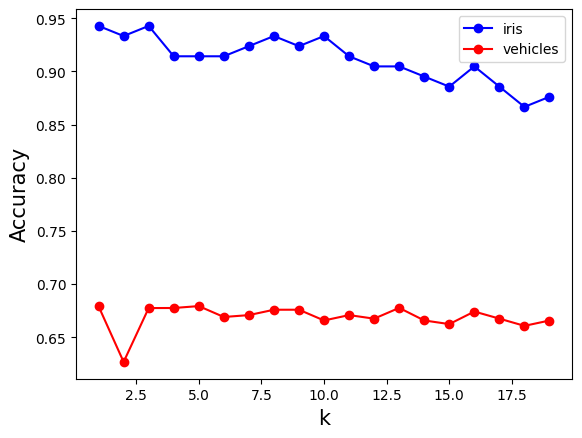

In [5]:
from cProfile import label


plt.plot(vk_iris, vscore_iris, '-bo', label="iris")
plt.plot(vk_vehicles, vscore_vehicles, '-bo', color='red', label="vehicles")
plt.legend(loc="upper right")
plt.xlabel('k', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.show(True)

In [6]:
print('Melhor k para os dados da Iris:', best_k_iris)
print('Accuracy para os dados da Iris:', score_iris)

print('Melhor k para os dados de veiculos:', best_k_vehicles)
print('Accuracy para os dados de veiculos:', score_vehicles)

Melhor k para os dados da Iris: 1
Accuracy para os dados da Iris: 0.9777777777777777
Melhor k para os dados de veiculos: 5
Accuracy para os dados de veiculos: 0.7677165354330708
